## BUSINESS CASE


My goal is to build  a machine learning model that can predict the wages of football players that will be beneficial to premier league teams when they are signing new players based on their performance in the previous season (2018/2019) and also build a recommendation engine that will use the performance attribute of each player and recommend other players that are similar to their ideal players even at lower transfer market value thereby saving more on their transfer budget.

I aim to build a machine learning model using numerous regression techniques and getting the best predictor model and that is ideal for your club as a premier league director of football, a manager or head scout.

Features of the dataset include the player's weekly wages, transfer market value, total minutes played in the season, age of  the amount of goals and assists, amount of red and yellow cards,  amount of clean sheets, rank in goals/club.
 
The business problem is the fact that a lot of premier league clubs overpay in transfer fees and player salaries and it has led to increase in sports tv subscriptions such as SKY AND BT SPORT, merchandise and stadium ticket prices. This problem seems to getting worse with each passing year.

Some premier league clubs have approached my data science company and tasked me with finding how they can curb this trend.

My aim is to develop machine learning models that can make sure that these clubs are not overpaying these players and they are not overpaying in the transfer market either.'

This notebook outlines the business case and initial foray into how the data looks like, cleaning and preparing the data for future modelling and OLS regression to see how the features contribute to the development of the model

## DATA PREPARATION

Import the data into the jupyter notebook

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats



In [324]:
import pandas as pd
football_df = pd.read_csv("players_data.csv")
pd.set_option('display.max_columns', None)

In [325]:
football_df.head()

,full_name,age,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Weekly_wages,Weekly_wages.1,Market_value,Market_value.1
0,De Gea,29,Premier League,2018/2019,Goalkeeper,Manchester United,3420,1710,1710,Spain,38,19,19,0,0,0,0,0,0,0,0,7,2,5,51,23,28,1,0,0.00,0.00,0.00,0.00,0.0,0,1.34,67,90,3420,0,0.03,310,419,90,18,€200K,200000,€56M,56000000
1,Matteo Darmian,30,Premier League,2018/2019,Defender,Manchester United,443,353,90,Italy,6,4,1,0,0,0,0,0,0,0,0,1,1,0,7,4,3,0,0,0.00,0.00,0.00,0.00,0.0,0,1.42,63,74,0,0,0.00,411,366,102,25,€36K,36000,€5.5M,5500000
2,Victor Nilsson Lindelöf,25,Premier League,2018/2019,Defender,Manchester United,2602,1112,1490,Sweden,30,12,17,1,1,0,1,0,1,0,0,6,2,4,38,13,25,1,0,0.07,0.03,0.03,0.08,0.0,2602,1.31,68,87,2602,2602,0.03,263,249,88,14,€97K,97000,€22M,22000000
3,Luke Shaw,24,Premier League,2018/2019,Defender,Manchester United,2592,1170,1422,England,29,13,16,1,1,0,4,2,2,0,0,6,1,5,36,16,20,11,0,0.17,0.14,0.03,0.08,0.0,2592,1.25,72,89,236,648,0.38,262,104,79,13,€90K,90000,€16.5M,16500000
4,Eric Bertrand Bailly,25,Premier League,2018/2019,Defender,Manchester United,637,349,288,Côte d'Ivoire,12,5,3,0,0,0,0,0,0,0,0,3,0,3,12,6,6,1,1,0.00,0.00,0.00,0.00,0.0,0,1.70,53,53,319,0,0.28,340,271,142,26,€100K,100000,€16.5M,16500000


In [326]:
football_df.duplicated().sum()

6

In [327]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 49 columns):
full_name                         3357 non-null object
age                               3357 non-null int64
league                            3357 non-null object
season                            3357 non-null object
position                          3357 non-null object
Current Club                      3357 non-null object
minutes_played_overall            3357 non-null int64
minutes_played_home               3357 non-null int64
minutes_played_away               3357 non-null int64
nationality                       3357 non-null object
appearances_overall               3357 non-null int64
appearances_home                  3357 non-null int64
appearances_away                  3357 non-null int64
goals_overall                     3357 non-null int64
goals_home                        3357 non-null int64
goals_away                        3357 non-null int64
assists_overall        

In [328]:
football_df.drop_duplicates(inplace = True)
football_df =football_df.reset_index(drop=True)

In [334]:
football_df.duplicated().sum()

0

In [335]:
football_df.rename(columns={'Weekly_wages.1':'weekly_wages'}, inplace=True)

In [336]:
football_df.rename(columns={'Market_value.1':'market_value'}, inplace=True)

In [337]:
football_df.rename(columns={'Current Club':'current_club'}, inplace=True)

In [338]:
football_df.head()

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Weekly_wages,weekly_wages,Market_value,market_value
0,De Gea,29,Premier League,2018/2019,Goalkeeper,Manchester United,3420,1710,1710,Spain,38,19,19,0,0,0,0,0,0,0,0,7,2,5,51,23,28,1,0,0.00,0.00,0.00,0.00,0.0,0,1.34,67,90,3420,0,0.03,310,419,90,18,€200K,200000,€56M,56000000
1,Matteo Darmian,30,Premier League,2018/2019,Defender,Manchester United,443,353,90,Italy,6,4,1,0,0,0,0,0,0,0,0,1,1,0,7,4,3,0,0,0.00,0.00,0.00,0.00,0.0,0,1.42,63,74,0,0,0.00,411,366,102,25,€36K,36000,€5.5M,5500000
2,Victor Nilsson Lindelöf,25,Premier League,2018/2019,Defender,Manchester United,2602,1112,1490,Sweden,30,12,17,1,1,0,1,0,1,0,0,6,2,4,38,13,25,1,0,0.07,0.03,0.03,0.08,0.0,2602,1.31,68,87,2602,2602,0.03,263,249,88,14,€97K,97000,€22M,22000000
3,Luke Shaw,24,Premier League,2018/2019,Defender,Manchester United,2592,1170,1422,England,29,13,16,1,1,0,4,2,2,0,0,6,1,5,36,16,20,11,0,0.17,0.14,0.03,0.08,0.0,2592,1.25,72,89,236,648,0.38,262,104,79,13,€90K,90000,€16.5M,16500000
4,Eric Bertrand Bailly,25,Premier League,2018/2019,Defender,Manchester United,637,349,288,Côte d'Ivoire,12,5,3,0,0,0,0,0,0,0,0,3,0,3,12,6,6,1,1,0.00,0.00,0.00,0.00,0.0,0,1.70,53,53,319,0,0.28,340,271,142,26,€100K,100000,€16.5M,16500000


In [339]:
football_df.head()

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Weekly_wages,weekly_wages,Market_value,market_value
0,De Gea,29,Premier League,2018/2019,Goalkeeper,Manchester United,3420,1710,1710,Spain,38,19,19,0,0,0,0,0,0,0,0,7,2,5,51,23,28,1,0,0.00,0.00,0.00,0.00,0.0,0,1.34,67,90,3420,0,0.03,310,419,90,18,€200K,200000,€56M,56000000
1,Matteo Darmian,30,Premier League,2018/2019,Defender,Manchester United,443,353,90,Italy,6,4,1,0,0,0,0,0,0,0,0,1,1,0,7,4,3,0,0,0.00,0.00,0.00,0.00,0.0,0,1.42,63,74,0,0,0.00,411,366,102,25,€36K,36000,€5.5M,5500000
2,Victor Nilsson Lindelöf,25,Premier League,2018/2019,Defender,Manchester United,2602,1112,1490,Sweden,30,12,17,1,1,0,1,0,1,0,0,6,2,4,38,13,25,1,0,0.07,0.03,0.03,0.08,0.0,2602,1.31,68,87,2602,2602,0.03,263,249,88,14,€97K,97000,€22M,22000000
3,Luke Shaw,24,Premier League,2018/2019,Defender,Manchester United,2592,1170,1422,England,29,13,16,1,1,0,4,2,2,0,0,6,1,5,36,16,20,11,0,0.17,0.14,0.03,0.08,0.0,2592,1.25,72,89,236,648,0.38,262,104,79,13,€90K,90000,€16.5M,16500000
4,Eric Bertrand Bailly,25,Premier League,2018/2019,Defender,Manchester United,637,349,288,Côte d'Ivoire,12,5,3,0,0,0,0,0,0,0,0,3,0,3,12,6,6,1,1,0.00,0.00,0.00,0.00,0.0,0,1.70,53,53,319,0,0.28,340,271,142,26,€100K,100000,€16.5M,16500000


In [340]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 49 columns):
full_name                         3351 non-null object
age                               3351 non-null int64
league                            3351 non-null object
season                            3351 non-null object
position                          3351 non-null object
current_club                      3351 non-null object
minutes_played_overall            3351 non-null int64
minutes_played_home               3351 non-null int64
minutes_played_away               3351 non-null int64
nationality                       3351 non-null object
appearances_overall               3351 non-null int64
appearances_home                  3351 non-null int64
appearances_away                  3351 non-null int64
goals_overall                     3351 non-null int64
goals_home                        3351 non-null int64
goals_away                        3351 non-null int64
assists_overall        

Drop the columns weekly wages and market value

In [341]:
football_df = football_df.drop(columns = ['Weekly_wages', 'Market_value'])

In [342]:
football_df.head()

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
0,De Gea,29,Premier League,2018/2019,Goalkeeper,Manchester United,3420,1710,1710,Spain,38,19,19,0,0,0,0,0,0,0,0,7,2,5,51,23,28,1,0,0.00,0.00,0.00,0.00,0.0,0,1.34,67,90,3420,0,0.03,310,419,90,18,200000,56000000
1,Matteo Darmian,30,Premier League,2018/2019,Defender,Manchester United,443,353,90,Italy,6,4,1,0,0,0,0,0,0,0,0,1,1,0,7,4,3,0,0,0.00,0.00,0.00,0.00,0.0,0,1.42,63,74,0,0,0.00,411,366,102,25,36000,5500000
2,Victor Nilsson Lindelöf,25,Premier League,2018/2019,Defender,Manchester United,2602,1112,1490,Sweden,30,12,17,1,1,0,1,0,1,0,0,6,2,4,38,13,25,1,0,0.07,0.03,0.03,0.08,0.0,2602,1.31,68,87,2602,2602,0.03,263,249,88,14,97000,22000000
3,Luke Shaw,24,Premier League,2018/2019,Defender,Manchester United,2592,1170,1422,England,29,13,16,1,1,0,4,2,2,0,0,6,1,5,36,16,20,11,0,0.17,0.14,0.03,0.08,0.0,2592,1.25,72,89,236,648,0.38,262,104,79,13,90000,16500000
4,Eric Bertrand Bailly,25,Premier League,2018/2019,Defender,Manchester United,637,349,288,Côte d'Ivoire,12,5,3,0,0,0,0,0,0,0,0,3,0,3,12,6,6,1,1,0.00,0.00,0.00,0.00,0.0,0,1.70,53,53,319,0,0.28,340,271,142,26,100000,16500000


Now that the data is prepared we start to run the statistical analysis

In [343]:
football_df.corr()*100

,age,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
age,100.000000,24.146762,24.116778,23.776256,24.840144,24.292223,23.788974,9.431414,10.060792,7.131097,7.709874,6.998568,6.588275,9.271041,6.477037,21.321035,20.214422,18.847821,21.509722,21.094008,20.288285,18.912801,6.492244,-1.094363,0.431610,-1.469113,-0.287197,-0.606443,8.572824,4.420676,19.643600,29.182412,15.539487,12.194696,2.107230,21.763069,22.900592,13.396907,7.497483,15.255016,6.680081
minutes_played_overall,24.146762,100.000000,99.191844,99.162036,95.177548,98.697990,98.721238,43.943015,41.268100,40.346143,51.972614,45.849019,46.055956,23.292350,16.842520,80.587653,77.307460,70.061454,91.876181,87.385346,88.819264,65.478895,20.295888,8.899951,11.660378,4.942128,4.660484,7.724818,48.776280,4.609778,37.779362,75.454223,55.852651,51.975353,-3.152142,44.169547,41.147810,24.335853,-9.389523,26.800879,37.503807
minutes_played_home,24.116778,99.191844,100.000000,96.721574,94.354125,99.574375,96.311842,44.489706,42.347458,40.129385,52.250133,46.581594,45.698322,23.730557,17.314419,79.822558,77.439777,68.265457,90.966104,88.246251,86.565787,64.783009,19.592229,9.310982,11.879447,5.312897,4.901699,8.193840,48.367089,4.188036,37.605646,74.611803,55.360300,51.469614,-3.199677,42.807416,40.171460,23.045688,-10.052955,26.745630,37.296484
minutes_played_away,23.776256,99.162036,96.721574,100.000000,94.435220,96.166452,99.534892,42.656558,39.483707,39.896767,50.826869,44.341638,45.655188,22.459322,16.082308,80.028249,75.888791,70.726535,91.276915,85.057453,89.638617,65.099952,20.675274,8.333627,11.243664,4.482531,4.337477,7.118964,48.382828,4.962634,37.328790,75.058809,55.426345,51.627075,-3.051391,44.822888,41.458535,25.245320,-8.558072,26.412017,37.092028
appearances_overall,24.840144,95.177548,94.354125,94.435220,100.000000,93.089971,93.194765,48.575785,45.398176,44.879958,54.624077,48.554178,47.952548,23.032225,18.184507,84.295719,81.031151,73.067755,87.273072,82.908311,84.448018,64.344116,19.625994,16.034908,18.040801,10.278172,9.444730,14.732486,47.683933,6.343737,44.698163,68.219733,54.866506,52.557341,-1.705257,41.376313,41.153131,15.500442,-11.865818,27.088543,37.147797
appearances_home,24.292223,98.697990,99.574375,96.166452,93.089971,100.000000,96.023229,44.348266,42.119477,40.120355,52.015910,46.289660,45.596325,23.938560,17.360563,78.765147,76.358988,67.432865,90.497402,87.916198,86.020593,64.888625,19.925386,8.743379,11.210941,4.964964,4.477164,7.887295,48.135986,4.009268,36.765373,74.715043,54.593256,51.148902,-3.201576,42.216853,39.628420,22.772822,-10.347977,26.611053,37.138485
appearances_away,23.788974,98.721238,96.311842,99.534892,93.194765,96.023229,100.000000,42.237617,39.171399,39.409088,50.723293,44.236831,45.580028,22.441081,15.744358,79.026822,74.991475,69.773216,90.766252,84.473236,89.223326,65.050146,21.286209,7.720051,10.720599,4.013885,4.100755,6.310459,48.219953,4.690406,36.641476,75.239418,54.820296,51.403984,-3.037348,44.336690,40.728661,24.783200,-8.805699,25.983504,36.656542
goals_overall,9.431414,43.943015,44.489706,42.656558,48.575785,44.348266,42.237617,100.000000,94.534908,91.024621,58.104815,52.082304,50.470910,60.663115,38.468758,44.389853,42.381508,38.854813,37.060776,36.302687,34.989543,23.027330,5.343081,41.014202,22.839644,37.124804

There are a lot of features in the dataset that shows clear signs of multicollinearity. The linear regression model is just a linear function of the input feature and it has the slope(feature weights) and intercept(also known as the bias term) as the model parameters.

The most common performance measure of the regression model is the Root mean square error which means we are trying to optimise the model parameters for the lowest RMSE and also using coefficient of determination which is a statistical measure that is used to assess the goodness of the fit of a regression model.

### LINEAR REGRESSION FOR MODELLING

To build the the linear regression model, we have to satisfy some assumptions which include:
1. Linearity
2. Homoscedasticity
3. Normality

#### EVALUATING THE RELATIONSHIP BETWEEN MARKET VALUE AND WEEKLY WAGES

Text(0.5, 1.0, 'LINEAR RELATIONSHIP BETWEEN WEEKLY WAGES AND MARKET VALUE')

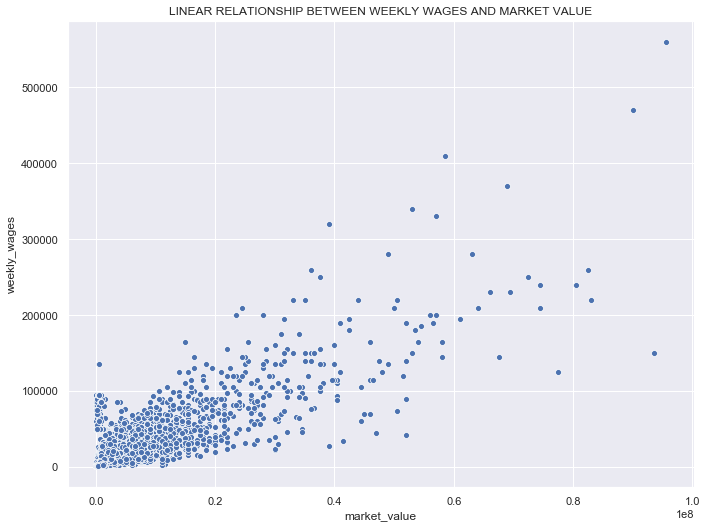

In [344]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.scatterplot(x="market_value", y="weekly_wages", data=football_df)
plt.title("LINEAR RELATIONSHIP BETWEEN WEEKLY WAGES AND MARKET VALUE")

Clearly there is a linear relationship between both variables but there are also outliers which means that we need to pre-processig the data so as to take into the account the assumptions of linear regression.

#### GROUPING THE WAGES AND THE MARKET VALUE BY THE LEAGUE EACH PLAYER PLIES HIS TRADE IN

Text(0.5, 1.0, 'HOW DOES LEAGUE AFFECT WAGES AND MARKET VALUE ?')

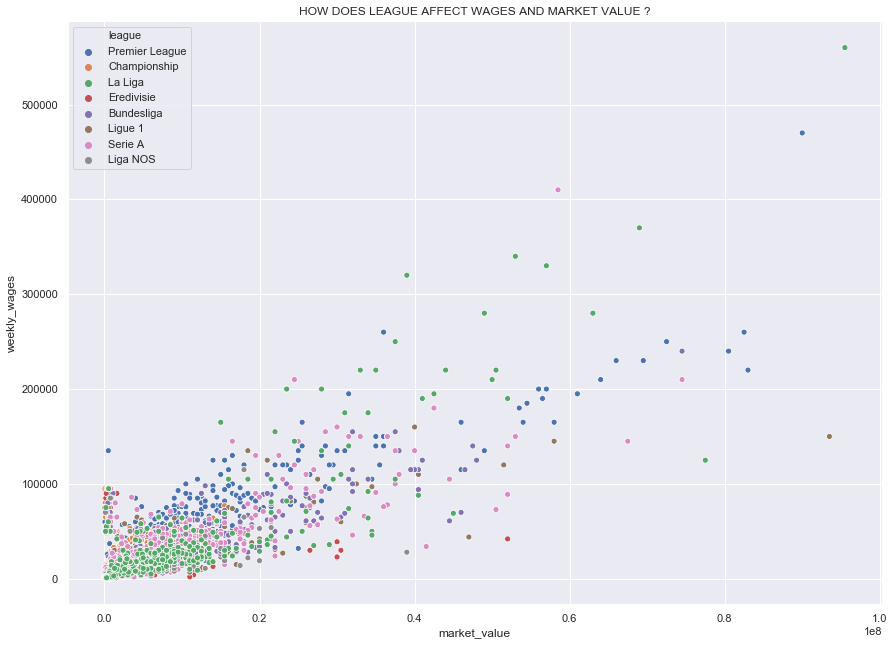

In [345]:
plt.figure(figsize = (13,10))
sns.scatterplot(x="market_value", y="weekly_wages", hue="league",
                   data=football_df)
plt.title("HOW DOES LEAGUE AFFECT WAGES AND MARKET VALUE ?")

Some Premeir league players and la-liga are definitely tilting the data into outlier territory which is because of the astronomical wages being paid in both leagues and they being the most televised league in the world

### ORDINARY LEAST SQUARES METHOD

Distribution check for the dependent and independent variable

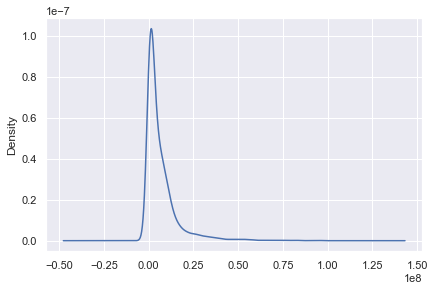

In [346]:
football_df.market_value.plot.kde()
plt.show()

Judging from the plot above there is skewness and kurtosis for the predictor variable Market value.

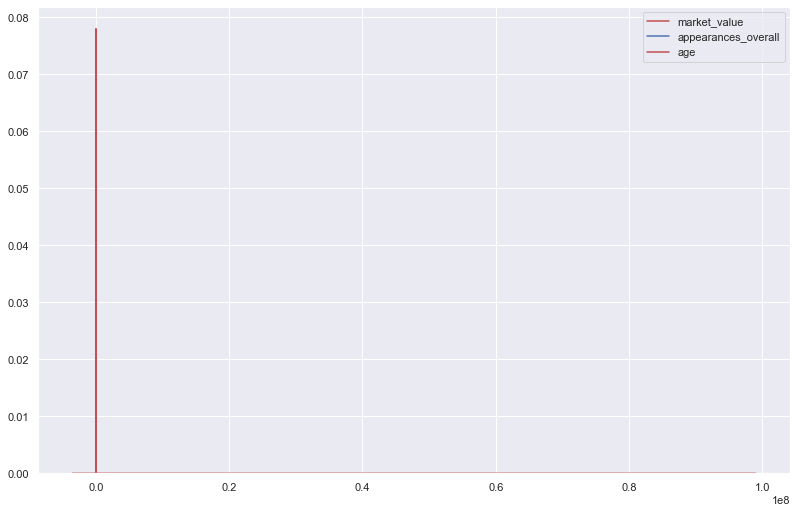

In [347]:
#for all the variable age and market_value to predict weekly_wages, check distribution by creating a histogram with kde
plt.figure(figsize =(12,8))
sns.kdeplot(football_df.market_value, shade=True, color="r");
sns.kdeplot(football_df.appearances_overall, shade=True, color="b");
sns.kdeplot(football_df.age, shade=True, color="r");


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


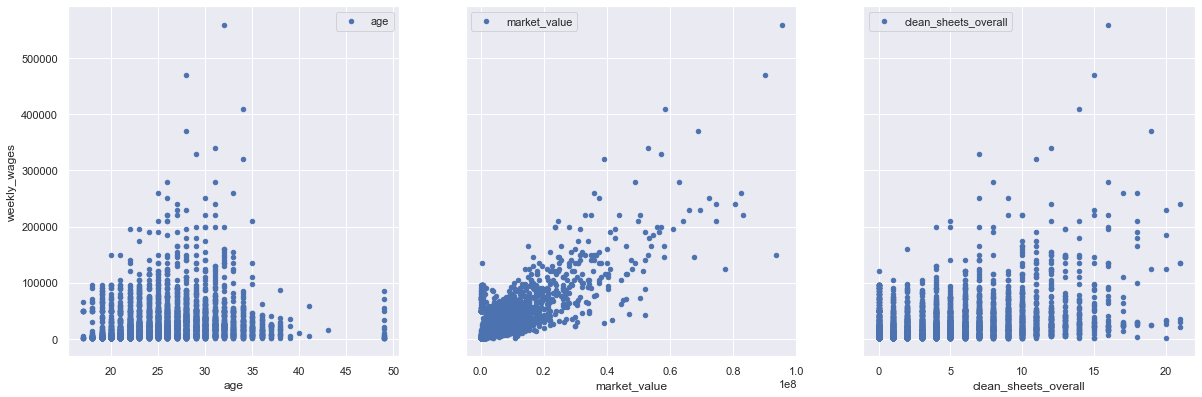

In [348]:
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['age', 'market_value', 'clean_sheets_overall']):
    football_df.plot(kind='scatter', x=channel, y='weekly_wages', ax=axs[idx], label=channel)
plt.legend()
plt.show()

#### RUNNING A SIMPLE REGRESSION WITH STATSMODEL WITHOUT ASSUMPTION CHECK AND ONE VARIABLE


In [349]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

f = 'weekly_wages~market_value'
# create a fitted model in one line
model = smf.ols(formula=f, data=football_df).fit()

In [350]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weekly_wages   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     6239.
Date:                Thu, 09 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:56:32   Log-Likelihood:                -38346.
No. Observations:                3351   AIC:                         7.670e+04
Df Residuals:                    3349   BIC:                         7.671e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7884.2996    471.297     16.729      0.000    6960.241    8808.359
market_value     0.0032      4e-05     78.987      0.000       0.003       0.003
==============================================================================
Omnibus:                     1840.047   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41807.329
Skew:                           2.134   Prob(JB):                         0.00
Kurtosis:                      19.769   Cond. No.                     1.43e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Visualizing the residuals of the model above

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


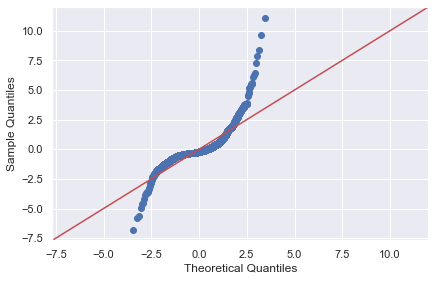

In [351]:
resid = model.resid
fig = sm.graphics.qqplot(resid,dist = stats.norm, line = '45', fit = True)
fig.show()

The residuals of the model are not fitted to the line, which indicates that the model is not obeying the assumptions of Normality for Linear regression. You can also spot on the upward side of teh curve lies a lot of outliers. Note that this model feature has not undergone any pre-processing.

In [352]:
#Next we run a JB test for Market value in statsmodels
name = ['Jarque-Bera', 'Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name,test))

[('Jarque-Bera', 41807.32883914486),
 ('Prob', 0.0),
 ('Skew', 2.133742529255646),
 ('Kurtosis', 19.76944787760619)]

There is a high value for the jarque-Bera test which is very high and not in the favor of normality, kurtosis is way higher than 3 which indicates heavier tails than a normal distribution and with a p-value smaller than 0.05 at 0.0, means the normally assumption should definitely be rejected.

Checking for Heteroscadasticity(Godlfeld-Quandt test)

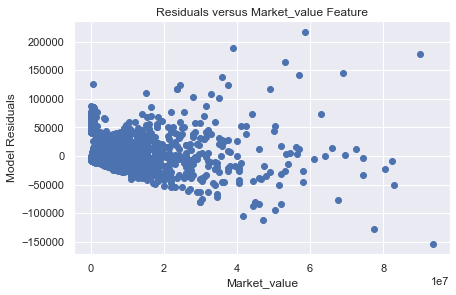

In [353]:
lwr_thresh = football_df.market_value.quantile(q=.45)
upr_thresh = football_df.market_value.quantile(q=.55)
middle_10percent_indices = football_df[(football_df.market_value >= lwr_thresh) & (football_df.market_value<=upr_thresh)].index
# len(middle_10percent_indices)

indices = [x-1 for x in football_df.index if x not in middle_10percent_indices]
plt.scatter(football_df.market_value.iloc[indices], model.resid.iloc[indices])
plt.xlabel('Market_value')
plt.ylabel('Model Residuals')
plt.title("Residuals versus Market_value Feature")
plt.vlines(lwr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2)
plt.vlines(upr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2);

In [354]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid.iloc[indices], model.model.exog[indices])
list(zip(name, test))

[('F statistic', 1.6153968535088135), ('p-value', 1.639623772576282e-20)]

The plot above shows there is not a lot of difference in the variance of both residuals.
The null hypothesis for the GQ test is homoscedasticity. The larger the F-statistic, the more evidence we will have against the homoscedasticity assumption and the more likely we have heteroscedasticity (different variance for the two groups).

In [355]:
model.pvalues # it is definitely okay to say the coefficient of the market value feature is 
#statistically significant to the prediction of the model.

Intercept       2.137983e-60
market_value    0.000000e+00
dtype: float64

In [356]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 47 columns):
full_name                         3351 non-null object
age                               3351 non-null int64
league                            3351 non-null object
season                            3351 non-null object
position                          3351 non-null object
current_club                      3351 non-null object
minutes_played_overall            3351 non-null int64
minutes_played_home               3351 non-null int64
minutes_played_away               3351 non-null int64
nationality                       3351 non-null object
appearances_overall               3351 non-null int64
appearances_home                  3351 non-null int64
appearances_away                  3351 non-null int64
goals_overall                     3351 non-null int64
goals_home                        3351 non-null int64
goals_away                        3351 non-null int64
assists_overall        

#### OLS MODEL BEFORE PRE-PROCESSING THE DATA

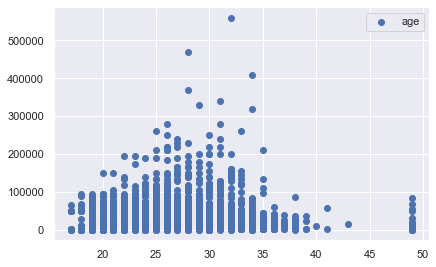

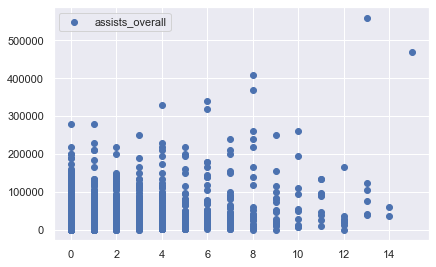

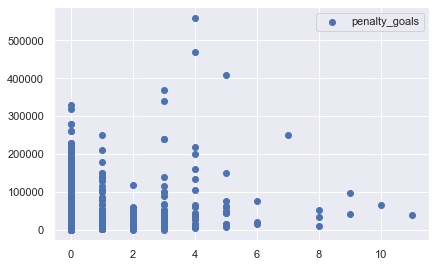

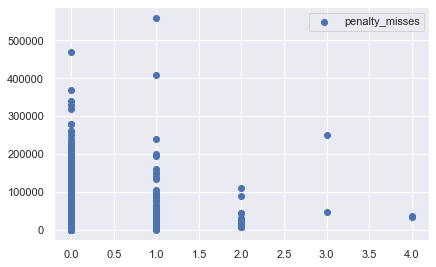

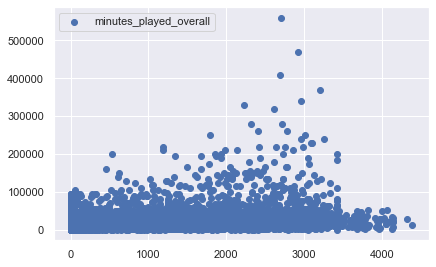

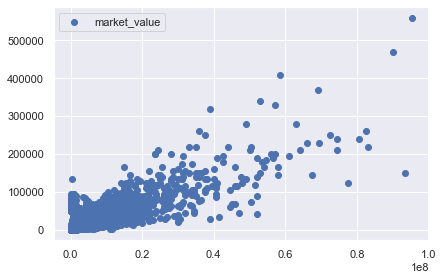

In [357]:
#checking the linearity assumption for all chosen features with the target variables using 
#scatter plots
for column in ['age', 'assists_overall', 'penalty_goals', 'penalty_misses', 
               'minutes_played_overall','market_value']:
    plt.scatter(football_df[column], football_df.weekly_wages, label=column)
    plt.legend()
    plt.show()


The only feature that shows some sort of linear relationship with the target variable is market value and there are outliers present in the dataset

#### HISTOGRAM FEATURES FOR THE NUMERICAL FEATURES IN THE DATASET

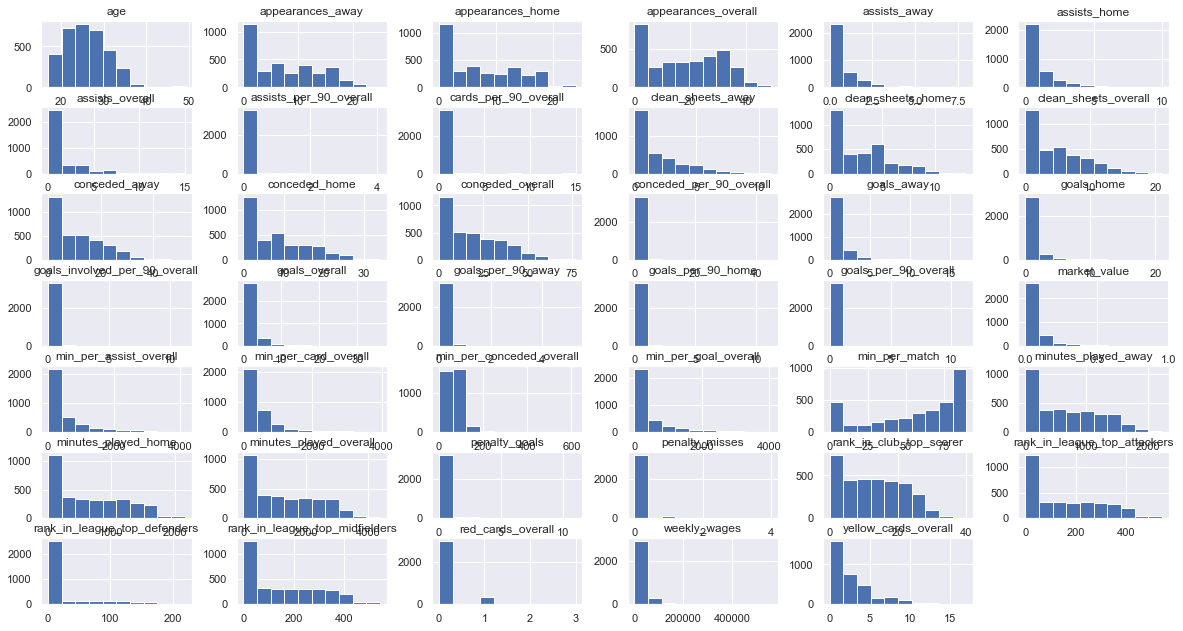

In [358]:
football_df.hist(figsize=(18,10) );

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~age
-------------------------------------------------------------------------------------


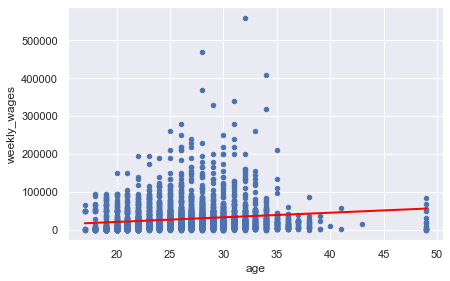

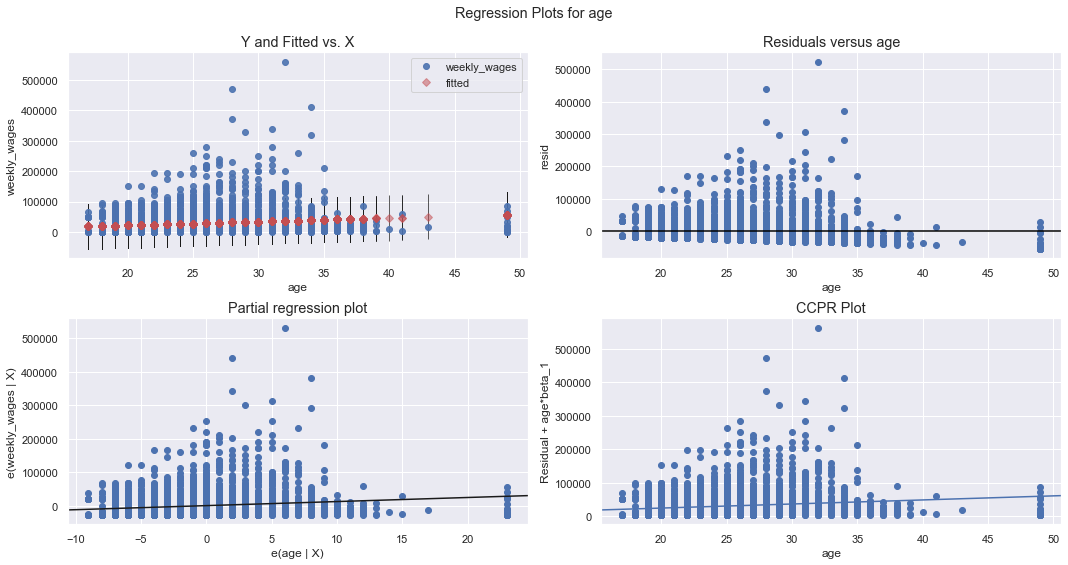

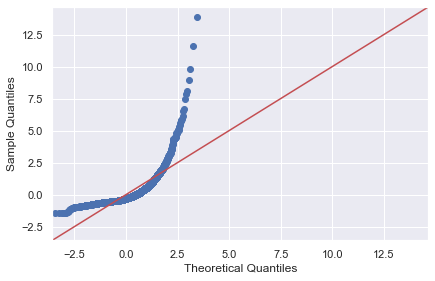

Press Enter to continue...Enter


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~assists_overall
-------------------------------------------------------------------------------------


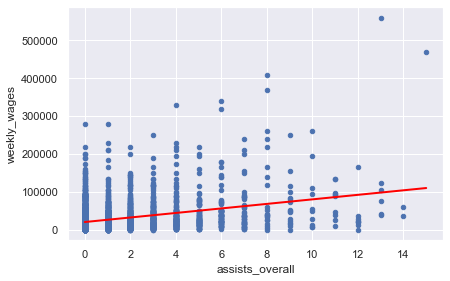

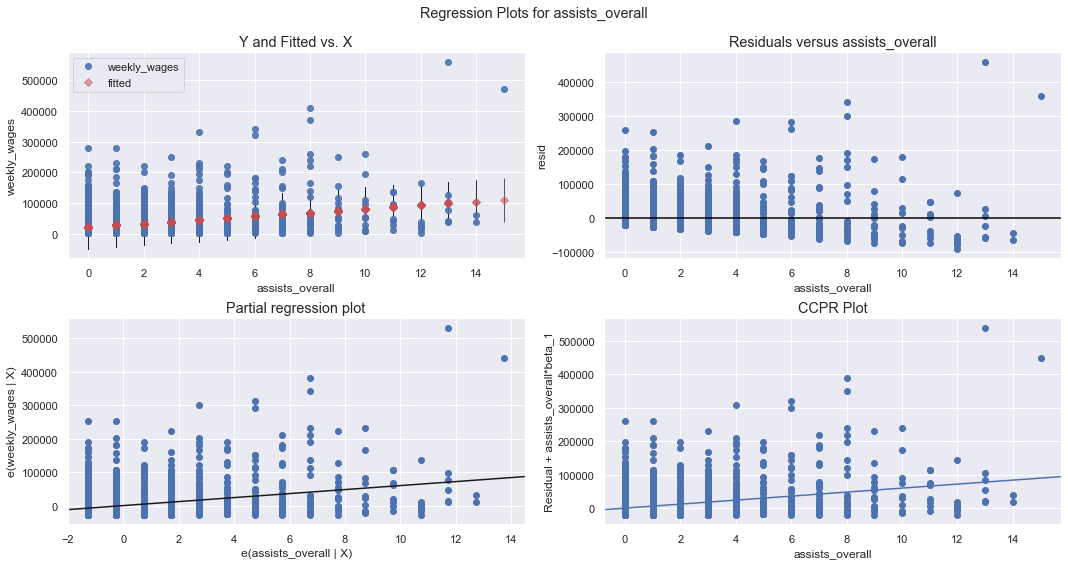

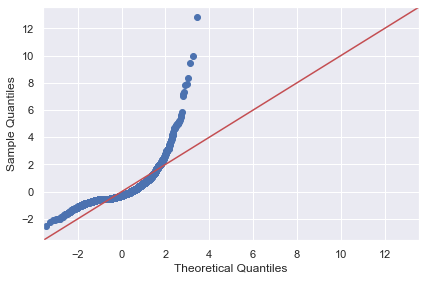

Press Enter to continue...Enter


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~penalty_goals
-------------------------------------------------------------------------------------


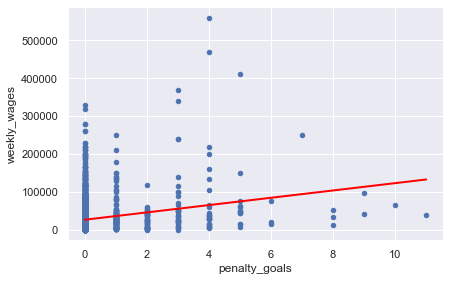

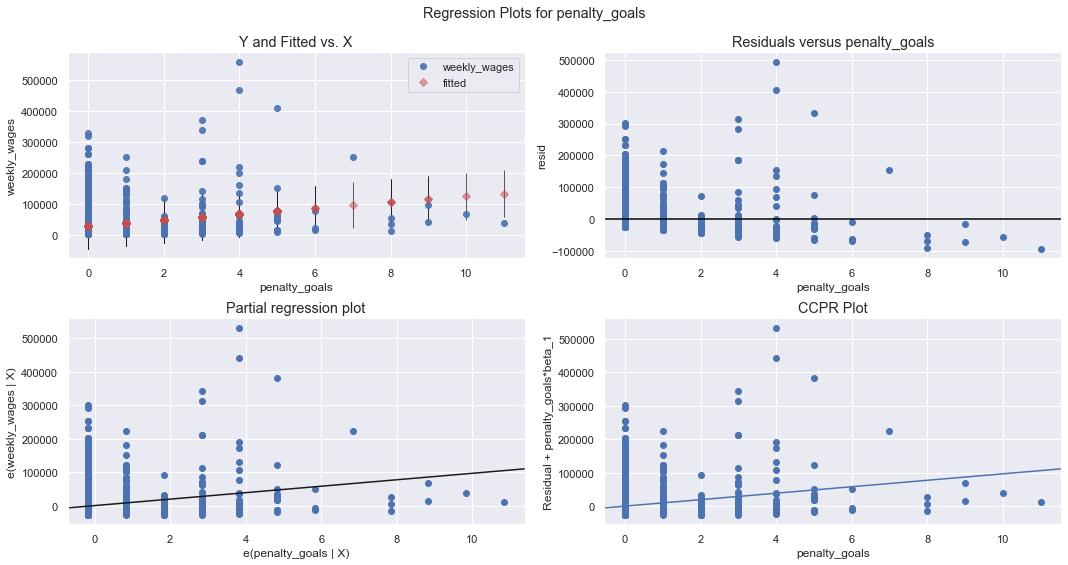

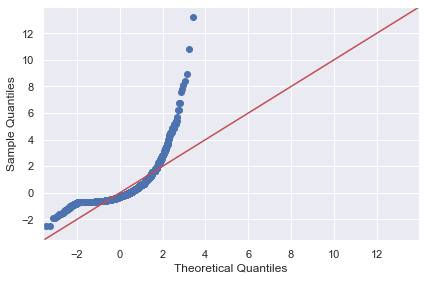

Press Enter to continue...Enter


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~penalty_misses
-------------------------------------------------------------------------------------


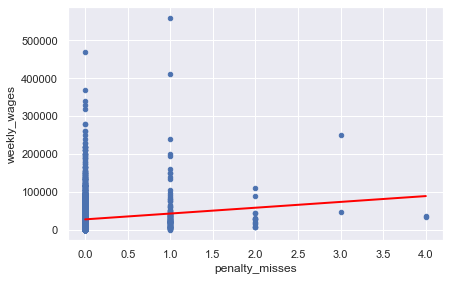

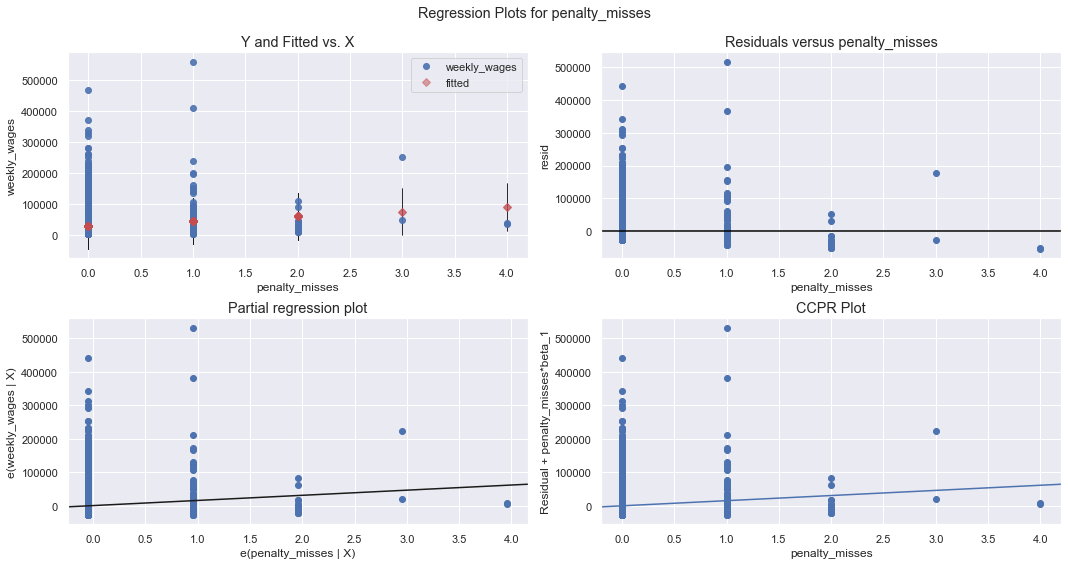

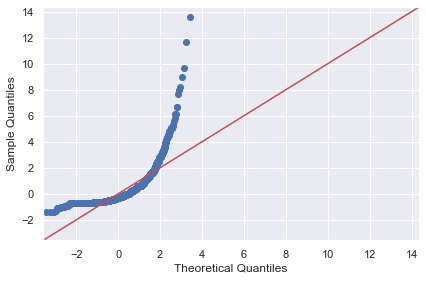

Press Enter to continue...Enter


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~minutes_played_overall
-------------------------------------------------------------------------------------


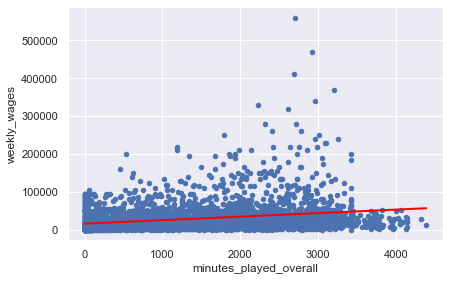

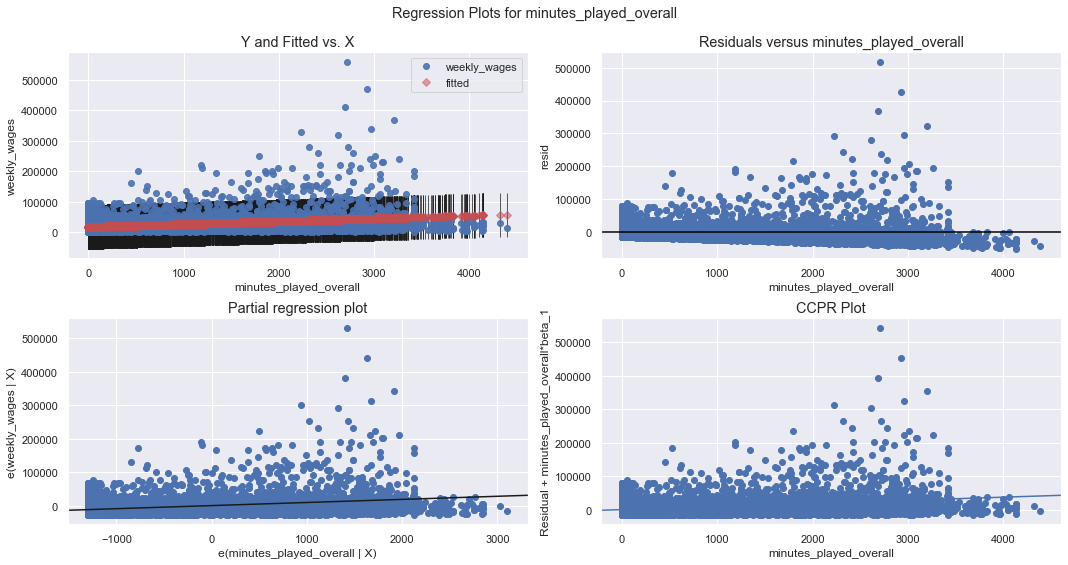

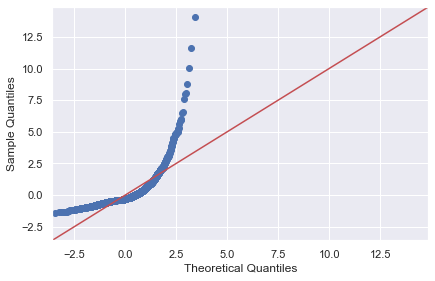

Press Enter to continue...Enter


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~market_value
-------------------------------------------------------------------------------------


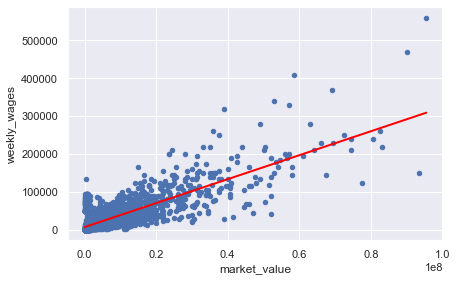

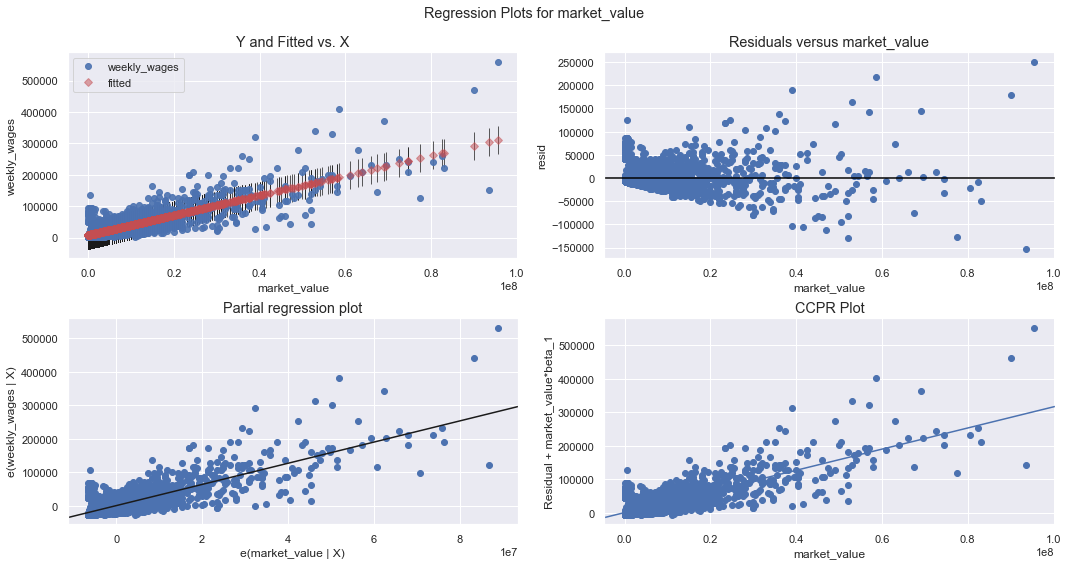

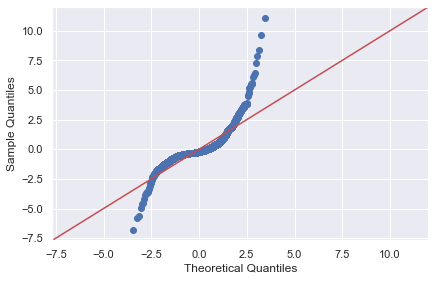

Press Enter to continue...Enter


In [359]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['age', 'assists_overall', 'penalty_goals', 'penalty_misses', 
               'minutes_played_overall','market_value']):
    print ("Player wages - Regression Analysis and Diagnostics for formula: weekly_wages~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'weekly_wages~' + val
#   
    model = smf.ols(formula=f, data=football_df).fit()
    
    X_new = pd.DataFrame({val: [football_df[val].min(), football_df[val].max()]});
    preds = model.predict(X_new)
    football_df.plot(kind='scatter', x=val, y='weekly_wages');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

In [362]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,age,0.0232716,-2785.86,1214.21,6.71506e-19,137928
2,assists_overall,0.109551,21215.3,5973.8,1.73347e-86,83907.4
3,penalty_goals,0.0372733,27179.5,9640.67,1.68381e-29,99261.9
4,penalty_misses,0.00990202,28115.8,15343.7,7.80872e-09,129697
5,minutes_played_overall,0.0718287,16813.1,9.26032,3.18379e-56,139863
6,market_value,0.650705,7884.3,0.00315717,0,41807.3


As shown above, only the market_value shows strong signs of linearity but does not satisfy the otehr assumptions, minutes played overall satisfies teh homoscedasticity assumption but does not satisfy the other assumptions.

In [363]:
#pass new dataframe as a csv file
football_df.to_csv('final_players.csv', encoding='utf-8', index=False)